<a href="https://colab.research.google.com/github/qbit5/Workshops/blob/master/Image_classisication_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from PIL import Image
import urllib.request

Using TensorFlow backend.


In [0]:
model = VGG16(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 65s 0us/step


In [0]:
def download_image(URL):
  with urllib.request.urlopen(URL) as url:
      with open('temp.jpg', 'wb') as f:
          f.write(url.read())

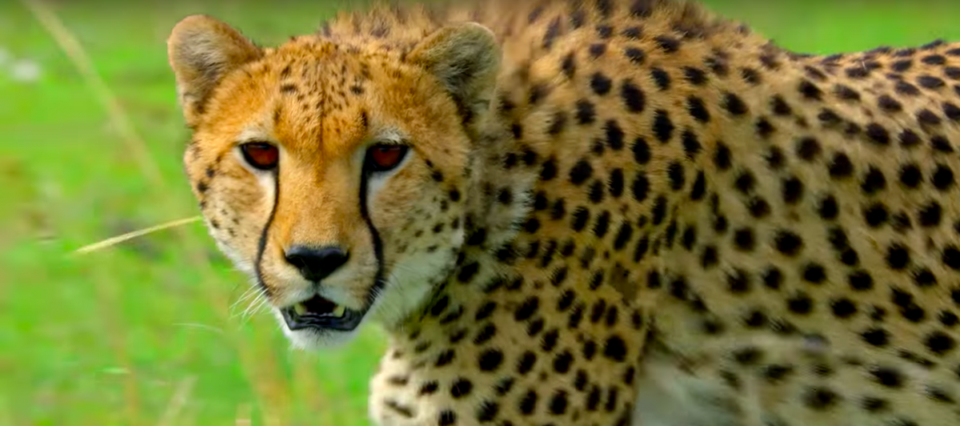

In [0]:
## Uncomment these URLs one by one to give it for classification

URL = 'https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fjoshweiss%2Ffiles%2F2019%2F04%2FScreen-Shot-2019-04-14-at-12.49.48-PM-1200x532.jpg'
# URL = 'https://animalcorner.co.uk/wp-content/img/jaguar.jpg'
# URL = 'https://s01.sgp1.cdn.digitaloceanspaces.com/article/12185-e21ec98d-f5ea-4021-9334-11b49e324c0f.jpg'
# URL = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUXGBcYFxgYGBgaGxodFhgYGBsaGBgaHSggGRolHR0YITEhJSkrLi4uGB8zODMtNygtLisBCgoKDg0OGhAQGy0mICYvLS0tLy0tLS0tLS0vLS0tLS0vLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIANIA7wMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAEBQMGAAECB//EADwQAAECBAQDBwMDAwMDBQAAAAECEQADBCEFEjFBUWFxBiKBkaGx8BPB0TJC4RRS8QcjYhUzchaCssLi/8QAGgEAAgMBAQAAAAAAAAAAAAAAAwQAAQIFBv/EACwRAAICAgEEAgAFBAMAAAAAAAECABEDIRIEEzFBIlEjMkJxkRRhgdEFofD/2gAMAwEAAhEDEQA/AHM7DmT3JpCVF05w5SQG1B0Noik0C1uJk5A2GUKLvxDaR2uaErKFlxful9P+Nu8BvvEH08pSUBLbEO44MNFhvHrty2zbnZTphxPmprEFTJTKUUEgBJAJdTWBD78oygE1TTco1ugllEGxYGxfVjwiT+szKCT3ioKUkpuDlKXHrvBqquWlKTlVmNgoNluHykH9KrbjxgwZfzxUo3Lt3Faez8wOZU5aElyEG7EnTe0bRhM4FlTzzbJr5Wg5VRmtk/Tq4t6G/wDMcTSW7rpPJhptcGBO6GzxEZTFkFAZD/MnlUqAAl1uL5nzP5P7R2iSkOBNIDksSl/N9PCAfrWGYkKZmzX11sW/zGJljM2XXW3GJ36FcZX9KGJJYyesw1SmaelJsQ6X00BZTN6R1Nw6ZmCzNsx7qEkFROwKlaRLJzAgbB7N99oGrJy84Sx10t1flF94jdSh0qtrlOAg5CgTAwcHOlSlB9HaYA4IsWaNTClKUoCzYWNnL7sIkkzytYClWLtYOf8AHPjA/wDXISsozAEHK2YAnfR33jZy2vKLnDWQrcTzuzstyoqWkKu4SpIH/JnAaDk4TOWoBc9ZAb9ILnz0flBMyYczi3t4tf4Y7oHQgd58pWixYsFHKxd8wtd3cPFY8nKxUjoUANmBKwKUDlJTLPCbNUFEElraAEgiCZXZlZkKlFaWEwTEsoFmGhJdhvfnyiLEMQXnaYpZSQMqrZu8AQLa73gmhKS+XYXCvzqfaFj1FPQUR9ekDYwxcwem7P1CcyQpWTLlSoqKgku/dZ2Fzyu8QSZU4ThKmzVJcOdFWt+m3PYiGCZqQp0qHS+mjONL8d4ExusWmZKYiySTexylgSRwST6wTG6OSCsxlxPjAIcyWmwQS1Z0VBd750Lylx+7vOToQeMFqZZCZsqVMI/cGYs2ykg+sCqmEp1zcWPG9rPG5AcgvZ9+TtFd8roASz0isLJP8wybR0wLCWkau6Vbf2qZvbbWBJ8qmSPqZAnKrKFJBBO+iW4bxNi+JS5LFeY6sEpc2Dnl58YWVi0rpwtH6SrNcEWLgOD8uYsZmN6EGMCCtnZAkiVUTvkD8cij/mCUVVOn9LJe5yyynTiybxXShxbVtHbXhzjtKjAB1L+DUbbocf2f5jeukUs0ATDLUwYFSC4fgpnECUeF0g7qZgIOxUsg9HLDwY2hfMJf57PxjY5+t/PzMWerP0Jgf8en2Y5Xh9GJau5LVlClMknMcoJPeCs3rvHOGSpWQfTlIASx1WSAToCXOYdQ7eEB0SgkTCQ4+mpxZiCnQ8z47xuU2VJD6WU5BIa2/wAIiZOrdQrAebkxdDjdnQk6rf7znFaGRPWZkxK7MMyk5QRf9Lj3gef2epiza8B/+o7mVJKlZpaydHCUuPBRt0PHnHNDWMsEODey0qTsdCCxtwfQxkdZlJH1CH/jMHE1ZMcIK5jpqMgD/tUO94XAMQIRNlD/AGpZWgEkgnvf+0gfaCDRgKJSGOt7+pjtFCCkqKlgnVld3TgxbwaC9tXNEePcEcrooYHzqpunWokKy5b3SctnDObh/KCamgWXCchJILEkDU6eZgOmlFP6TqNdT8/Md08mcq/1cuzFL7bEEe0Fwup+BEX6jEy/igzs4JOUf+8lNrMhZIu9lnfxginwgpuJ61PrnTmY8gVOOkKMHxpaQZNVkCgSlzKTqLEm131fdzFno1HM4Sk7EsODcOkFtOVVuA/FZb5agq8DC2ImkEFwyco0Y2zekESMAKT/AN1SiBYtv53iwyaRy9/WGEikgwxr9QJyuNXEn/TuZ0ED1uF94qc6NYC3Hzi1/wBOI1MpQfGNlVMyMjD3KSjDUpIJSCR+4gAj3aB66m+olk2UDZeRJ8L/AC0XOroARpeK9VYcRbf56QMqAKAmwxZuRMqVRhdRmBRUOCdClA+xeGlJJSgF3UDd2UerBt4mxBJQpgWCgd2e6faFxVldz86wGwh0JvizjZk9bhMqd/3ETTYMpOdLcLZSPbxtHNL2YSlTpnVIFrEp2/5FHtGGaCkX0jimlKOiiHOxtGWK3fEQiB6rkZNWdmZSmLz0qsXSs/d4ys7PgyxkUsqSXzLVm15C23CHNFhf9xJPMmGqKdIDNFDIPSiWUavzGUOm7PVDd+aAGPdYb7OBpBiOzq95rEggsE+rC8XP6YjgywICwBNkRhWIFAmVmowQmX3pve0cJCnHApIbxEDooQJWWYygCoFxr3ioWP2izqQGgcoSbW3/ABEGQKfAkbGWGyZVJuF04DmWrRwBmD201d+RgdGHyNk1CegmLbfgofaLbVUSVMkWGrwrrsNy3G1228eUDbNXlRUNj6dW/WQf3iP/AKQgiyqg3t3UW6jJp1HlHU/Ck2f+pD6ASnduaZZgtMtWpDbki1yeBjr6uxfLbQ6O48vxAx1GM38Iwekf1kMGpKeSZKlJzTEKDKJbQC40DG+kLZWDISAgKnpCnT+pDJ62JPnwgr+gQlM4JzZVyy6VKcZiVPuAQQlIL878CsIniYkhaWUl3IUGIe3RmGvKGGccV4gVE8eMh3tmsH0YLJwuWmxqJ5LkaoSPIpuOl41JwKRmuqc+/f16hr6i+vtDenlpQokdASz3/a5uxsevWNzpRLajiHZ+YPhvGOX0B/EKVN7Zv5hJw5QVcqOzd0W/9oeO1S2DJAHJ2HmzvEaJq1KKFnvJLEJbJyynV24wQZKkp4kaeXNoaL7pBFFwkqGyt+wgX9OsKcs27JJN+N4IRJy2AJ30uftGJrFklJGRQ1SS6v8AyH7QD5xLKlKIuNLxRZVakG5S43yLyytQi+vwaXPT9RAyzQQGdtLHNa1t+UOMEQs2WD62PkNR8Edf0CSynPLbXiN4YUwAGphhLO2EWyKq6UxtJIAgoThCFVaxjaK2Nl4ILLAJsdBcKpVTbjBUqcDGec1wELN4GqJIMSy1xkwxoGVxlZxejJHdIB4kO0VGpoVhRAbe7KPmWb1i94nMs0V2bTi542d+MDbGG2YRWK6ERoQp2KgOgPq5iyYPSN+ClvfWAqPDwouS3zeHspISG1hU0IdAa3CgzRwuYBAsye0VvG8Zy2GsL5c4QRrHiLGWObiSRvEKcSCizx5fMxlS1kZwkDnf/GsG0WJozgS55UrdJGragGEcmTON/wC42mLEZ6BNqy0LZtex1jg1L+XtC2uUD1hFuodmqMJiH1H0jFEsBBJrUnURT5M/LDKXPcQT+qyJ5lN06xrWT0KDN4wFU4eSnusLb3+4hRXJmP3D8/MNOzuIBSWUe85BeD4svcNtBlSg+JggoFIzLJ+olihYazKvlZPediTvq8JZ1CJSiqUpSUkkp/Uw5Ow2YRc8QllnD2u1/RuTiF0rHGUSxSo2Kmd2LXAsSCRq0dQZBpar/ET7RJLgmz/76iZCJy7hi1/0pGmmvMx3ITUXAmyyxvmUQrloQ23hxhpLx1ZJEwJLBwoBx1BNh6NECsWLFRygZrLAVoRoWTo/UaRnup+kTXYf9TH/AK/1Jly5hnrKSjIogupJdFrgE3BPMGGEtxlGYqLjQqULa30FuQhlJkXse783iKsSdU3/AM32jo6AupyxyJC3ElXNX/UHKgrSsJKSFNpq9iGhrTz5gDkE8mF78uTGJUUgBPdBfU2c9eMdzpSUB7CIoAPKR2YgKTcnJzB2b5zPtEJmm+rRBLrgUkgF72Ob8eMQmpcFvf3sIJyBEHwO79SOfW399ILp5lieXz1hGlbzTce33gs1gJCQxOjBtYUBs7h+Oo/lVgASOQg5CvPaKwakJVxLW6j2hlLxH/bKtDoevIRrkJOJjqlrLcYkqK0JS723it0s9KhnSSC/eve+kQ4vXEjK45vq0DbPwQsZtcXN6ElxCcFqJC3GvSFk2v7wSnk58YU1dapRyp05Q+wmhlpGcpdXO/uI5i5c3UNQNCdJsePAtkbjGmLJDxtdUNg8DT6vYDyjcs2eOgwoUJz7s3OKuZa5bpFSxeZnzAC3X3iy4hMsQLq+eUVCrQSWDEnnbwhDOPkI7iPxueeYzVEzAkHcg/Z21h32NdSwMiWQmyu65Bu+t4sMnsrLBzzWUel+mrekTGklIGVLDe6fcwbN1mM4+0sxh6bJz5mMBiiQDf7HygaZWFdxbmd4DSLvYHY6+sbn0bh8xAL7Hg0cwY0BnYXQmp09KWK1XUS3hBdNPOqVOPKKhiNPMlrlgd5Lln2LB/YxY8LQpYY2g+bCqoGu5SvZIIj5EwLFz5GEVLOVLqlAGz7G/OGwp8pHCDZ2H5gFJ14BhC2BgCR6MBnTwRLBSnOjXbrC+bQrUSkzkJDWZBdtCNQPeDcHQQG05R3Vy301HDXibbuzR18XyUTnOeLHdRRSdm0KWSZ00jeycpCswZyLh36GDD2ap2KAkh9wTtyJKdm0tEOB1ry8qmcLWHJ1OdWpsxLecFVeKJkoCigq2e9n0zHdwNW2hhFU3QEA7Pqyf5mhPUL5lP0BHlw9Yk/rVhJOTOfBNjwc7RDUMoEaHQFhAlLTFLODMPEOk+TtDXNDoGJjmIeK1QuCgf8AE/dQLDyMA1OKq+oUGUogtlKSku/HxfaDFLQCxSpJ5n76QJPnSwoMDmYi4UBxsU7xDxI8y1ZlN1Jc5lyFkpZRu1rW5awixXG0oSySSeDcYZYhXAI5nZzFHxPfS/nCuVwtIpjWO3t29xdiGPT8zg+D/NoIoO0CioMoIJso20PHxhLV0z6+34gCbSnUExpVUjzLJnpOHVJQoqSpKk3c2L7sCDcvCzHO0v0ylxmzXAdgOfPWKPIXOBYFTHX41jzhtLoVzGVMUSeJPpdopkVNsZFBbwI5w3Hp6y2YhALpG4fY+nlFhq6ta2d3YAm14r+H04Rx6gfgXg2dU3Dk9CP5jmZzzah4nTwKFF+49waT3nIBPhbn18IsEycwvb5x4RXMEJIJBUlttj4t6PDFcwn7fOUNdOvDHf3EuqycnqEmY54jhBAqLe/4+fiE9TUkW/MTSpndjT5KglWRYvWFsqX4MN/zBmEYcEpC1h1Eam589oUKplLmB/0voHc/w8WSlOazBhxMLrvZ8nxDtqgIJXyAbpLcuP2hQUoIKSz+35iyT6Z0/pvteKZiaihWZiG1H3jnviPP6juJwREtQgonBJVYmx+feHKqwLUUJ0SLna45WhN2mqU/TKh+tu6Lu+3q4jnsxgExMr6lVOMtJvkBYt/zVseWvOHTjVsQdjR8fvBtlIycQP7/ALSTFahJUgC5Qt1NcAZSPdosWHTEqQ6CCRwPCA5FNTj/ALYMsf3KBDvu6rqdoJOFSQg/TmqQ/d+pLH6bfuSbDyHWBvi5KBRAHubOb++5LKxNMwhrs2sWGhIMeb4XTrppyqeaRmQxCtlpN0qTy9i4i94LOzEEaQr1OHtZBXiFxtyxy008izwrr0TMxvlSCC41J6sR82h9SJ7sQzpQLg3/AIvHa6dbUTkZWF78SpowQTCvMqxLnXV9cv6X/mGCOzaMrByeJWpCr7Zg5bl0hzTyQm2XW5Y3fprEim4A9XFveH0U1ZqJOyg/G6iWZThiSH5sG8d4glVKpZys42YKJbZibG0O0/TH7Y2JUtR0icMfqZ/E9yuVGIEmyF5rbC45gGOJMyYoOZeVPyzOYshlyzZ1pfd4CxFFiASecZZVAsSxyLblYrpWZ3bk/wDMVnEEKJLGLXUtcMetoQ1FPd/nlHJ2Hszprtalcm0x6njEP9M/+IdzUg9T82tEtLhyiXuBxJaDdyZ4RbR4cTdrDcwYmSHN8xFmBb7faG86lCEsC+5BJ8HBNvGFoJa4IHk//j+YXZyTDooAnYCmcpA5C/8A8rwHPUUupyPL3iaoqizAED19N4AnrKmAJ9D88IrGpJ3Cs1CWPA5qigBmHMuT4cPl4ZrqGe1/bh4wswqyW+7+cd1E25aHWNLU51W1zS5pBfUmDKQlTAX+/wCBChcyGNLUhCba+8LeTD+BLFNyoRl1WdT9hBGFAgP/AC3T4IQSlnKXPeNzy+cIfYLLZDEvy4cXhnH83/sPEXc8Vk06aCC3HwflxbyvFY7QSyULYCwOzt12284si6HvBV3/ADoITdopWVAcd3Nf/kdQOgt5CA9ThN2Ybp8teJ5xg9ItE1BnKKlHMoJP7WIH32j0DBqQT5iQpiEXIGj7dSP5EUzFZxSpcwB1BLA8N7fN4sXZbEFS5AdkgJdSlXUpt22JvbpBsWHvuHaYz5+2tLFH+qs6aiciTLQVSspXoVOXLuC4SzcNtYh/0zx5S6tFOJWWRMH01sSQlRcpU/7dCGiftbisucCAp1AEOe6NS5Duwe4OvlC3/TOUmXVJmBWZINlENfLqA9iHIte/CO12148K1ON3W5c/ctv+qeDKQZSpQLyllOv7FB2fgCLQb2RUSz2hv2onhS0hSXFiTa4JLH3gfsxI0BcR5rqU5OMY9HU9Fhy1j5ffmXSlTZoFqgoK7vs8GUgYsYErV9+OljTiROe7XcgUqZsWPQf/AGOnKMVInEglRNrhOUDq7lvLhGTFKT0uxB09IDmzDoo+Ll/OGGehAKlmThQO6fMfmOhLPEeY/MCmTqSVlne59eMRLnBAISR0LhvMRoqo8ylZ2OhC5qGDi/G4ceBhfVLF3JPjEqqrMG7r75dIArCWLk9NoWysK1DqDfyiLFphGiVeF/VmhR/VFuHG9v4gjEl3Onr9oVomqfU+xjmnZjqihGNNMBu3lc+F4YSlpSHufLXwOnlCRKdTcwfS1gBDpBJ0cs34/wAwJoQQtcxKmD34atzJ28YGq5A2Dk/uLffWOlzkgnTpz4/HhbiC0tcqvsAw8t4wBZhB4g9WU3A14v8AfQCFhUAdbR3UkJOpKjq+346RAs7tDqLQg3a5bcIUCkWbrcmJp5vyEL8BnFQ5D55QVXTAI0zCLcTcGqDq0ZKUbD4BEEmcCQIkmEgnhp/ELtrcMP7x1Sz9Q/wC584suEVIAA5fm3vFLo16fNNB5w6oyUqS2gP2/j1g+B6NiAypqXNCgTfYep+e8Ie3MkzKUqSLpVnbe3db1guRU5r7DaCsRlhUsp5e4/MOMOQqLj4zxL/1JJSfpzEqLk5lW6dTvElTjEgJaUvM/wClLXvYBttor/bOm+nVLGxuPHf502hNJmFKgoaggjwLw1hwqoBEVyZWawYbWrmLJsQCdNy3E77w+7AEpnEr7qEjMVKYBLM7vyh9h1NRVUkTJaihYvMlkgqTsW4jgr7wIaVFRPlSJSQpElS1KKWLqXkDE7sEpvxJEO5gioWBi2EMzAES0TMdVOP+2DlzWKhsHSzHQEOW5xdMFWkpSQGIgKj7MpSgZRdgR1YP4Ee3KGVJSZRwjg9t+4WM7HcXhQj5K94TV09WchKX5ksILM5g28C0pdRPxjBS3zAmQvwJg8kqI7wKTvofLlHX0lEM6TzY/aD8gBGYr4C59WN9YFqPppLqWpJuwcgkcdba7QzYOqi9EbuJ0qWogiYzXLgkEcG46W5QTJpiCQLvcD8Pp0eCaWWcrqLE3YD7nWOVJLftO+h9DoIzxUeYY5XI0INUMkAsBx1fxhRXVbbfjygrE5xBO0VPEcQL8YQ6l6NCHwrezJa0OM1n6CEy5igYYyJxV06En1gWtlWOvi/oYWXzDmZKmA6C/p5NGKs5J22hMquy2Y26wTIrc4jbYmG5A0YhjxduscIlFixYjn5NHKEEkNBORiTq8C8CWG3EkxLH87wPNU8NaqW8Lpku2l4axtcoiN+zsx7eUMcSISG3hRgasqhdocYiA14Hk9zI/NE8udlJU3IQdKnZh7fmFU9oyVUEb2iitrNe47p1EF/KLBTqDDkHPMnTx3hDRJzIfhDCinEEvoGIH/iIrE/A0ZjIvIXLFh6wl31YwyUXRa7j2+PCSQD3Dxbz+GGNItww2J/j0JjpIREXE8p/1GwlRWJiQ/HxJc+bPFWoOz06YR3bONbR7d2goElBdiwvb5whPglGPpJIFwL+H+Is52T4iZGIN8jPO19iZr91Vrs4PuIu/wDp/ha6ZKkTk5F5kqBBFxcMDooam3FjcRfsLwlBAJFvn3gjtBhOZAWj9SH8Un9Q9H8Ixky5eJvcJjx47+o3pZYygjl6RLMpXHOAsFnj6YB1FoPlVAYuf8wbGeS3Bto1FFchrfBASJc1zkKdyAQpx5c4PrSS5Ac7QvNaxFi4DKu3DTwYwEVysw5/LQmloqNRMQ/9rKbz1iSTJmlzMUgk8Bo3Xx846TXKsrLm4gWCgeoZ/wARLUTSFABwNX9oZUr5EWZWGjNLmDK4fTUeegvAiZo1dJDbR2FkP3yndiA3/wAfSBJ9UxLpUBxCQPF7HzjOah7hcFkUBFWNzDcxTquZ3nOnKLLj05/3Zop9VMvp6xyX+TzoIAFjOlUHGoeOq5Q/uL9FfDAeGEqD294cSpKrnI9tbOedmYRgWDUjVKuuSrM49td+EESqQfqcDlxg1cllubbMNHcbdImk0hbiekMJbQDsBI6NuEFzpfi8cJktpEM6vSghLwc4Fqov3jchnyiIXzJcPgh0vzhfVyYVONkjKZQ0CpbKEOK5eZIhMgXHWLIKRkDjFEEg1NlgCJW6iVxgFRHlDivSzwiqJbiN4TyG5sx5geKgAJOmp9zFlk5VBxvHndJLYv6HhvFxwWa4A0isyhTM0ZYKOYpLci48j/ENaaem5FnOnmfeF8tNoml6wXFaxbIQZPWF3G1h5D/MK8GBQv6Z0e3jrDLLrziCbT3fxjbgkhplCKKyy0q8rAaNb7wTOrtj0f2+0J6KcSm50Ljrv94LmLBv5wwuxBMam5C1CJ5TnUwMJ4Gu3sYyfO7pKb+IHv8ALRuhUwCb3J6pCiC1m5+sKpiF5mOU2vlJJvxtq3HWOEYsVODMKWP6WQetyGOnLUaxBW1+VpiCVgFlpJdxyt3SNiNdxwwaMLsQqYpkFRzgAuO4W03IHrHMqpXNShctIXlcEXGocehgKnxR8ysxCQWyrFmLftAZ+d4HXiCCWMlbaOlGUAJ2sQWe46nxvkBJwY+TB63CatWUq/3lcM49AWSINpKCfLdM0d3/AIqFur3i4GShY7wcO/iNC3GAq5KCGCvMtFOgI3Jjysp1KZW0YUXUbCK9iOHu+VhFrxiZLki8wW4XPhFHxHHEKWU3JuzfNY5zY2B+MeR7G4bgYL6DcbebGLXKlJygkueA8BcRS8NVMTcpLfnpFlw2cSDYj5wikHzlZTQmV9CEqCkgAknjpp4b+UQsEjiecHzplrxWsYxRKQpiCRp/mH1VFiBLOak1dWJTv3uEKFjMc0Vedia1rJJPLpFgw6cVAOLRtgR5kK0Lhksq4kDrDKmBIY3Hr5wNJpySIt/ZnAErH1JymQCwGmY9dhGOF6lAxXS9nyr/AHGZI479INnyrRcccQlEoJSAAAwEVOeYj41RaE0rlm3KxicqEEyXFsxJLxXqoAGOeh4sROkuwIJIkB3I+Xiz4Ijvc/nzxiv06nPzjFmwcBwYrKx5C5Z/KZYQGD8IE/qSVMNI3jM8oQkAsVH2gOlXpx+CG2Wc69x1IVBWUamAqe146qZ/OCWFWzKALGhGElnYbxOurlJUEqJch7gjgN+cCdnCZk19gCYslXRy5iVIUAoHUawTDkDrYlZU4moAhEosWLwYFpZg46N0hVMkzKcAIdUkPrdSGD6nVOvMc9mMhYUHF/F4Nd+Ji5solF3QC+rpSfteNCXJH6UAdABpp5P7xIZYtbyjn6Q4/OsTcliayIzZsicw0LBwOrR2meI4EkmwPSOGUDw6xNytGcy1FBylim2Rze2r+kIu0CVOSi+ukOZyVLSzgEEFPUfnTxit4nUqDLAvd06XBYi/N7wvnNIYTDReUnFppJIPrFcpZWac+jP8MWvG5yJ6gAFBQ1doHo+ziwrPlLNYtrCOPKFU/c6TJ4jzBqYqF7jlDmbKCQ5AhfhihLBKocowozpRK/qJKv0AJVYbFVnJPtDHRilutxHqTZlNxvFdUp00MUjFKwxZu0OBz5Bdae6TZV2PmAYqWIJDd4tBEBL28gZQtCKFLc2i1YXMytwMDYfhYLKNveH1JRBxB8rcqqBGrsyw9nqQzFpSNTHpOFqEofRIylN+ShrmHHW/CFPY/CgiSmYU95Y1J0TsB7w8XTuzpuC4vp84RaD3MH6gWPl0baxVZnCLBiKCQynCr5Q+vOK1UKZ3MVkloYFXAekVXFCAC3+YtE+aIq+KJ7xjnMPxAZ0MJ+NQSiU5v84xbcHNx4RXKKRcesWTDkEFPUQLKQXFQv6YTj83vpHACIaOZf5tAuJqJWoxBRT8y2EPGc8S3SiyXG8K6uY6jf58+0FKqrZRAGqn6e/494B1R0AIbpx7lr7KhgsgPYCH/wBc/wBhhZ2Ulf7aj09oegc4d6RQMQgOpP4hgf1C75T9vaBJWHhJeXmRdylgpPQBxl9W4Q4+n4xgTyhihF7iyXVkuMpcbEEH11GkdGatv0kcw1mPMEQXV04WljYjRV3B46gta43EAU1UUApnfUBRYrykoUP7goOw5KuG8YsmpBubXOVujXyjPrH+x4ZBCePt+I5VTA6Ejo34irE1Rnmk7HZn90LJFZMVNXmUVJUHAcd0gAW66wwn9m5qbKITzLt5gGB1dj6n9Usy1dFsfUD3jeTGrKVHuCxsVYGWDsvgaJxMxSQ791ywfdz9ofVmDVBBCZaCNsqh7KaKgilxJH00fQIlouSlaFFR4MlVhuXi2UWNKOqVApLKQEqKgwPg+luYjmYun4LxI/zOjkz8vkD/AIlMx4fRBC0lK3ZjrCM4wrcnzi2dsqGprchl06kpSTeYpKVHh3SXAudWisTextYNZQ8FJP3h7AvFdRLM1tuDVGKhQyruOd4rHaCXKy5kW5Pw6w9qsFmoPfQpPUGAZuFA6h+sH4WbgTkrxFmHYwLBR6Q//wCsykAauTpbbXyhb/0RH9gjYwhH9ifKK7Ik70u/Z/tktKCEqcBmCuHK+kP5fbl9Zfkf4jy+RRhD5UgcWH4gl1c4x268TYyXPSJ/aynmDKpJBOhsW/EJqmeNQYq8urSAHSX3+cYKGIhuEBdT9Qykfc3W1JSeJMJKqeskHbd7QZPnpURrct84xIJSLB7njeE3QqbIjWPIPE3TTQ8WHD5oUzawsFKlLO38w0oJCtkHyhUIeWhDFxXmSVlEVkBI19ef8/zCZYEsli7G5HL7RYK+rWgBI0mDK7XDah9h/MI6+YFjIlrfqI0HU7mOgFvcSJrU7pqgqc8f8Q+pKMKEUczChZyktw3/AI8fKLbg+IpypvfYRHw+zLTNWhL72fQEIynfeHKkkcGhVgVcAnvpBHX2hyKlBBKTqNNx1EbwLwFDxKzNzNyEGMBjkzLWIjAr5aGYCdkxzm5Ry/OMzRcqA1GGqKkLlzDJYuuWkJKF9QQ6Tr3ktrcGC1Kb9Qb1iVKo5UhKh3gCOYeMkSwxEHVJB19YQ1GFzUThNkKBQoBK5arb/rQoaEAnukX47GxGMIiDUsjlA6ZSyNAnmfuPtBBS/XjEE6SorCkqazEbNx6i+sT06gQ4IPHly67RfmV4mgiOckT5Q0bCYoy4uqMNlzAykv5/aFFX2RkqHcGU8XP3iz5ekbyRAWHuTireRPJscwf+nXLStTCYrKk7OEk/YwMcJP8AdbpHrFfRy5qCiYkKSdQoOLX33ffZhAEzC5EvLmSSLJGpItYEu53vrB1zD9UXfB7E81OGRpVGoBnU3By3lHp6+zclVwFJ8fzAkzskNpjdU/zBOSGD4uJ5kvChrd4GXhZ2d49OmdlFbLSfP8Rz/wCk1f3p9fxFHgZB3BPKFUK0lwPF/bhBWHTgTkmJGZ+6T9o9JPY5X9yPX8RFM7EZj+w+Y/8Aq8YbHjb3Nq+VfUrldVpQmWDcFQSFWtY+ukGU9QoJK0lwkOX0IFj5X9YYTv8ATwKILhwzf7kwaPtpufOCJPYqYkpaYzF/1E6ggggpuC+kD7CA2DN93JVVF1VLeUoK0UHHXZuBhJKwsAAAsBoBp5RdB2RUzGYFhwQFOWKQAG4aDxvBMrspxmeQ/mNKiLMku3qUZWEJUGu3IN7RxJ7NICgfqzkt/apP3THo0vsygaqUfKDafBpSf2Oed42WUzIQgxNgmGoyN9SaRzKAbdECH8miQnQKf/yV+YJRKA0DR2RAeIjAJi6bIMoFUpJI3lA87lD6H/jodmOs1LUpmJzJLjQ8QRqC2hG7wW0DVNAFEKClIUCCWNlAEWUBr125gkGqkuSERpvCA8OxITCpBSuWtFlJWBw1zAkEcwYOMaqSc5YwxtxyjANoqpLmhp85xzN0PzhGRkZM0JEiOaYMqYBYZz6gE+rxkZEEtoTv4RiNI1GRczO0jXpEa/nnGRkUZpZtY06wPWywpJSQCCC4IcFi4cRkZElnxOOzp/2vH7mGrRkZBRASLKI2Rp1+8bjIkszR/MbUG0jIyKEub4+PsIBqFn6ZLl7+8ZGRT+Ja+ZuiLpL7E/eJEqPrGRkSZM0FG9/lo7T+YyMiSTS945AsesbjIkhmH8+8dN7RqMi5DNI28feOm9zGoyKlzuWNPnGNJ2jIyJJP/9k='
# URL = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEBMTExIWFRUVGBUWFRcVGBUVFxIVFRUXGBgXGBUYHSggGBolGxcXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0iHyYtLSstLS0tLS0tNSstLS0tLS0tLS0tLS0tLS0tKy0tLS0tLS0tLS0tLS0tLSstKy0tLf/AABEIAOQA3QMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABAUCAwYBB//EADwQAAIBAgQEAwYCCAYDAAAAAAABAgMRBBIhMQVBUWEGE3EiMoGRofCxwQcUI0JSYuHxFSRyotHSM0OS/8QAGQEBAAMBAQAAAAAAAAAAAAAAAAIDBAEF/8QAIhEBAQEAAwEAAgIDAQAAAAAAAAECAxEhMRJBIlETYXEy/9oADAMBAAIRAxEAPwD7iAAAAAAGFSqo7uwGYMIVE9nczAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFbiaqc2v4bfX+xYyZzjq3c31l9ErENX5E8z7UmUmneLs/oy0wuIU4358+zKNTuZ4au4Svy5nO+krnuOgBhSqKSujMsVAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCr7rOXoNpNPrL8WdJjG1B2tfvscnHHRk5Qfs1NWovmlo7Mp5NSai/izbK24ardk907xfoynpt3utL/TsXWDTaOfl3FmsdenAcS8zgy9Oap03SqKS11ba63v8A8/Qmy8QQXvQmtuj3+Jzi5JJ1qocnHbe8rgEDBcXo1NIzs/4ZaP67/Anl8svxRZZ9AYymlu7EPEcThHRavsLqT6TNvxOBT/4o3tZEilVm+ZyblduLFgDRharknfdOxvJI0AAAAAAAAAAAAAAAAAAGnEXtocjjcGvPU3yWnZ3udjUT5FNxDC33X0M/Nnv1o4N/j4g4bDZru1ru/oy0prKrcyLhaqWnTcmUdWQmv1Fm721VUUmMWpfV46N9ClxUHK5VyTpPjqrlRWr6/iWnCOK1KdoyeeGyT3jpyfTsY/quhrlS0OYtl7iWurOq24rHzlUs3pv2RBni80rRenXqacfiFGEu66N/RFZwKMpSu/l06FmfL6lMfx7ddw+HUu4OyuV2CpWWpLUZTailZL3n+RpnkYte1PwsbR9dTceRVlY9LIpoAAAAAAAAAAAAAAAAAABHxSVtSQa6sLnLO3YosWlGDqtaJ3ey0Sd9/Q+dv9KVWNOniauGjChUnKnHLWcqvsyktYZUv3GfT+LYTPh5wS3T0633X4nx6r+jSVSpBJyjTUnK2ZtRu7txu7Rfwfq9zPZnOr20571nuPqUeL05UPMjK8ZK67XWxWYjHxtGN938xwrw15dFQ2jH3V2XU0PhSU9eV2n0M/JdWr8TEXeEp54XXzIeKp5VqUHEPFbwmSioOdSbahFW156329dlYovDfj39alTjVpypqu5qnmlCcajhbMrxinF6rdc1uW5z3jvpXb1vrt0VeacJN7WZo8P6Jy1djzD0ZSukm1Zp/MuOBcDq2aasn10/Dchm21fbJmy1acPxfmWUacvV2t63udFQp5Va1jVgcGqcbIkmzGbPrz+TUt8AATVgAAAAAAAAAAAAAAAAAAHjPTxgR6c1eS5p2+Zrmkn7tlzf9iDDE/5mpHsvp/c8xvEo04/tFletnZ5ZL1WifZlfc0s6ub05Xxv4slhq8aFKMM8o5m6k1BO7tGMW95PXQq/DHjyniJxpVac6dSTa1Ust+mZ6XKXxuniainGNOeT3VK14yWzg73vtprey00IvgTw7UWMlWq5tElGLkmpeqS0SaT33Rz8ZUu7Fz+kPw/50b3yu6alzW91m6OyIX6NPBTp1vMdsnOy1lurOV3preye6T5I+mU8Iptueq0+HwaJNSrCjDRK3JKyOSXP/ABO7l/XqupUGpvJaydrcn2OkwE24pNWtyZU8FpSk8z0T1XfuX6id48/tXya/T0AFqoAAAAAAAAAAAAAAAAAAAAADxs9MZ7Ac/h6H+YlIt8TSjKNpK6/Ar8En5ktOf3qWFRXRXxzxbu91zfEvC+Hq3flwct02tb+qsa8DwNUZZnUTtytd/Nu50FPDmOIwisds69O1PxLi8YQWvZPa77I1cNtVms+uu3JPb8TRjMNGdSzV7ddbJGujPJGbX7qlb1Ubr6ma7tvvxomZJ59dxh6KitPv4m0peBca81KM1adrrkpfDk+xdGrNlnjJqWXqgAJIgAAAAAAAAAAAAAAAAAAAAAAAOe4HxeOIlUlCLjGFSpSWa15OlUnCTstlmg2uzW2xcTmii43glRjiK9GDzWdSUY3Tk1B5nFJP22m2uskr21ZzXgXxV+szxMYRqeVRcPLnVk5SmqiqOSu7uy8tNJvny2OOvoKmkRuJ115UvaUVbd7JdT51h1i5Y7E+bRclGpOUaiqQjloLK4NZpry4xjttduWtzr8DhXiKKlO6jJJuElya1TTtv7MrWTTbWmqOa+O5+qOPiCg6qpU25SldX/0pt2vvt96X0vPJZYrVyu99I6WXyTX2y4wXg/D0ZuUIWk7q7lObs9XFSnJuMW7XSteyNlLDLNN9G/vd2+hn3jr4043/AGrVTcI576r6W6F1wbxHf2KrvbafblmXP1RAxi9lrqU1Km07Ll8v6EZq5+J3M39fTYTTSaaaezWqZkcDgOLVKMla7i94t6P06P71Oz4dxCnWjmg/Vc4vujRjkmmXfHcpYALFYAAAAAAAAAAAAAAAAAAB5J2R6eSQGiGr9SPg+EUaTk4U4xzNyeWKV5PTM7LV20ubbOMrcuRIzqwdRJ4CDtdK627c/gb4UlGNkeuot0e03fUDBwKt4Rxc3e+ZuXpfl6FzJEWutCOpLHc31zONRXtK5bY5XkUuPllb/m2+LSMdbctdaF3yNvC8ZKnNSjo1/uXNMU1ye/5czBQt92+/6kZ5e077On0HA4uNWClH4ro+hIOJ4VxF0p3Xuv3l1X/Pc7OjVUoqUXdNXTNuN/lGHkx+NZgAmrAAAAAAAAAAAAAAAAAABhVhdENVLaE8hY9ZbT+D+JyuxjNM9p3sZU56djGpU5B1tp1OphilpoafPtubm04uxy3w69c5ipasgV4ZrLncuatNXbIVVJO/QxfttnxWzhrry0Nc49ibxOKvGSvrv07GFON13H4uzTVBO1736Fv4f4j5cskn7DfP9x9fQrowt8DBw/Alm9XtHUmp0+gA5vw7xnXyaj20i39Iv8jpDXnU1O4x6zc3qgAJIgAAAAAAAAAAAAAAABrr0lKLi9mjYAKOlWlC8Zbxdn37/mS5a6o1cXilOEv4rxfw1X5kKU3yZVm9eLLO/U2aGGnrl5NM30KOemnez5+pqjRcZq/z+BKuSoONlZMp6vtWXUsuINlXQ0l9ox/dNk/8vOKysoxXx+HJff8AXGjP5/n92I3FKknKMVH5av58jfgKMkrv7ZLX1zM8SJRNTj9/kSraL1/BM0TqxX32I1KIdSLvdHa8Bxvm0ld+1HR9+j++jOR8y/IsvD+Ky1UtlPT48vr+JZxa60r5c95dcADWxgAAAAAAAAAAAAAAAAAArfEFK9CTW8LTXw3+lytwNRSjc6DEWySvtZ39LanPcNwjjFa8tSjc63LF+LLiyrrhr9j0bN+Idos14GFoeupljPcf3zLb8VT65zGPcgUI+0yTjpamunSumjFxzvTZrzKtnVfma9bbWLnC0LpFVXoPnqXHBamZK/LQ1xRfncbq+BeUq6mES/M62skofA5bFVU20UcuJL2nxbtQ6q3NFOu0780016rb8iQo679yNjYWu+1/v5EFv+n0aMrpPqelD4S4z59FRnpUirP+ZLRSX0v39S+NubLO4w6ll6oADrgAAAAAAAAAAAAAAFDiOKqUW7S0v7DTjLTk4u2vqct6dk7WPEK6tlutd/REOdSMcqb952S6vou5zvBeNRrr3ck/3oXUpQfRtbv00LbB4ynUqWjabpPdWeSdmrJ8pWb+D7lU71r1bes5dHTjZJdEjVjZWj66EZ4mXdepoeJUuZPksk6Qxm2omMoJ7IqcTxb9WlH2VJ66O+hfNanGcZ4XXq1pTjOMYu1rxcrJJJ6JrndlOcX7F/5T5pLreIo1H/44xfa55w/i0YVE3onua+F0aGVpr2lv5kYqVr7uNrrnuTv8KwstXSafdyX0T0O/y/tz+P6jqViYzhdSTTWjOWx+CmpOSXy6GDwNGGsM8eynOzfW2YzljppWT/8ArX4MjybzZ67x41m+K+ljlmyvR9+xux1RON7dn2te5qrzUr54pba9PRmOCxSU4wi7p2T52SX2vgU41PlX6z54xw8rNODcXycXZp2IdLxBxGU5QeKyuLtby6Wq5NSy9DraHhCnK03OpFvW0ZWWv8trFhQ8L4eLu1KT6t2fzjbQ0549Z+Vl1yZ19jhsTLE3Tniqzbe2dr5RVki74ZLiSn+yalTa1/WMzUX1jZ3+F7HX0OHUoe7Tiu9rv5slE84s9tQ1uXyRXcPwNRWnXqupPokoU4f6YLf1k2yxALFYAAAAAAAAAABhOlF7xT9UmZgCIuF0M2byaaltmUI5rdL2uZzhGnGTUdEm7RWrstkktWSABzFHjEalV05K0rXSb1a2vl5L1IFHisJ16lOMZKVPL7UtFPMr+yt2l12OnnwXDOfmeRBT/iUVGT9ZLVmEOA4ZVPNVCHmWtnt7Vumbe3Yhcd/U5vr4gRqu3V9Eerh85/uterLylRjH3YpeiSNhLM6iNvdcZxPwMqzzebKnOzjmg1e3y1sS+E+F6lGGR14yS0h+zacV0ft+0++h1AFkpLYoH4bv71aXwil+LZhLwnF/+6p/s/6nRAj/AI8/0l/k1/blJ+B6UneVScvVr8kT+H+F6FJ31k+7LwCceZ+i8mr+xAAmgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP/2Q=='
# URL = 'https://pbs.twimg.com/profile_images/971571886197899264/TTL7sjc4_400x400.jpg'
# URL = 'http://www.golfian.com/wp-content/uploads/2016/07/Innocent-Abyssinian-Cat-Face-Photo.jpg'
# URL= 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTPBISm0CZ6kFdT_RPF5Z5Yk9kQOnVhtqtXszk_9OGsRcnSWlGB'/
# URL = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRMFE5P1YIVBMgfko7BO_Fylvpu1w6d2oPuQYa1QoZKn6nPE1iR'
# URL = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhISEhAPFRIVEBIWEBAQEBAQFRAPFhUXFhUVFRUYHSggGBolHRUVITEhJiktLi4uFx8zODMtNygtLisBCgoKDg0OGhAQFy4dHR0tLS0tLS0uKy0tLS0tKzcrLS0tLS0tLS0tLS0tLS0tLSstKystLSstKy0tLS03LTctLv/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAEAAQUBAQAAAAAAAAAAAAAABwIDBAUGAQj/xABVEAABAwIBBAgNDwoHAQEAAAABAAIDBBEhBQcSMQYTIkFRYXGBMlRyc3SRkpOhsbPB0RQXIyQlMzRDYpSywsPS0wgWQkRTVYKEorRSY2SDo+Hw4qT/xAAZAQEBAAMBAAAAAAAAAAAAAAAAAQIDBQT/xAAqEQEAAgECBQMEAgMAAAAAAAAAAQIRAwQSFDEzUSFBUiNhgbEiMhNx8P/aAAwDAQACEQMRAD8AnFERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBEXhKD1FbFQw/ps7oKsOHCO2g9REQEREBF5dc7sx2XxZOERkjkftpeG7Xo4aGje9yP8SDo0UaevFTdK1Pbi9KevHTdK1HdR+lEzCS0UZ+vHT9Kz91GvDnjp96lm7tgQzCTUUXnPJD0nL31noVJzzRdJy9+Z6EMwlJFFnrzxdJS9+Z6FSc88fSMnf2/dQzCVUUUnPRH0jJ39v3V4c9DOkX/OG/cQzCV0UTevS3pF3zgfcVLs9PBQ9uo/+EMwltFERz0npEfOD9xUHPU7pFnzg/cQymBFD3r1v6QZ85P4ap9et/SDPnLvw0MwmNFDnr1SdIR/OHfcXc5v9lpylDLI6FsRjm0NFry+40GuvcgW6LwIZdUiIivCVG+dnKLjRT6DnNFmNuCRcGaEO7YJHOu+yk4hhtyE8Si/OU72hNyxeXhRhafZCwjNzY7/ABqtoeNT3Dke8eIr0HXyr1FVNqJxqqJxyTzDzq8zKVWNVZVjkq6gedY6qCKzGZbrxqr6353P6VkN2TZSGrKFd84kKwqH32Lrsf0gpu2RV4MU8bo7XjeAdNhNxe2AN7G3hRHE5stlNfJlGnimrJ5Ynuka9kr9MH2J7gRffuAupz8dBRdXP4o1Hua0+6lH11/kHqQs/XvdH1yb6LEPZwGx7Yq6rjdIJwwB5bolmliADe9+Nbdubd5/Wx3n/tZ2bV3teTr7voMXYRuXrpp1msThy9XcXrqTWJcK3Nq7pz/hHpV71sD04e8t9K7lrlk6WASdOvgruLz7o79bH/Wu70xUHNpb9cf3pikQuWPI9I06+Etubx7uCObcWJ9WSd7jWN+YDdID1XJj/lxqQXu3JWpnls4HjC2V0az7NNt1q5/s4mo2FhpI9UyYfIZ6Fi/msP28ncs9C7TKhs48i1Okt1dvp46LzOr8mk/NVv7eTuWehefmq39vJ3LPQug0lSCry+n4TmdX5NKzYkw/Hy9pnoV1mw6M/HTdpnoW9iOCvwqf4NPwk7nV+Tm5NhsY+Om/o9Csy7E4wffpv6PQurlKxKg4lWNDT8JG51fk4HLNAIJGta57gWE7q2sEDeCl3MI72CrH+ew9tlvMou2Xe+xH5DvGFJWYJ+4rW8D4D2xIPqrn69YreYh19vabacTKWkRFpehg5X6Dn8xUXZyD7Rn5Yf7iJShlk7gdV5iotzj/AAGf/a/uIVWu3VDrdZF7Y8fAFd0PlDwqwNZ5fMFVYKM13R+UPCvdH5QVkMGOP/ap0RwlBk6Pygr01M9rdJxwOrdDHmWEGjjV0uuLHSPETcAcWPmQdNmwPurR9ef4YHqRM/fvNH16X6AUb5sj7q0fXz5FyknP57xR9kP8mUPZz2bZ3teXr5+gxdex64nNw/2GXr31GrrmvxXQ0o/hDg7nu2ZocsoO3I51rg9ZTX7nnVmGFLK3OWLI9VvesKWRWsJa2V6R+5WlrXrYTSbkLTVsi2UhhC7lR1wHcLQtPpLY1LrwtPBh2lp9Nbqx6NuGXpICrQcvWlVJhmRHBZEBWJEcFkU7ljLGVcpxPMsSpOJV+V2JWLUnEpCQ5PZd0cR4n+ZSD+T8/dV4+TSHwzqPtl2uHlf4gu7/ACf3ezVw/wAqn8DpfSuZue5Lt7XtwmlERed6mvy10A6rzFRbnF+A1HJF/cQqTsuy2Ebf8TyO0xx8yjTOIPaVTyRf3EKrXbqhu5VDnG+9zheuKO1nlUZvAOJvchVW4m9yvQAvUFOjxN7leBg4B2grllTw83nQdLm2wypQ9f8AqPUmZ/fg1J2S7yT/AEKMc3B91KHsj6jlJuf/AOC0nZZ8jIhPRyGbx/sUvXvqNXVbbiuL2ByWjl66PohdMZl09GP4Q4W5j6tmzEqzYZNzzrRtmWdTTbk8oWc1aGTJIsCWVVSyrWzTK1qkMyolwHItRVyLKqZdXItXVSLZWGdYZUT7wuHA7xrU6SzKKTB4+Tda1zsVnEdW2IZbXqtrliterjXKpMM+J2CyaZywIn4LJpXLGYa7QuSOxKxqp2JVcj90VjVTsSkQVhzmyv4rqneJdvmBf7Zqxw08Z7Tz95cNso6GPqz4l2OYR3t2cf6M+CWP0rl7vuS7O07cJ2REXmepptkWun687yMp8yjzOI32jVdRH/cQqRNkQ+D8U7r94mHoUf5xB7Rqutx+XhRhPVCF1lNpWnEzMHCLE257rEXoKKzhSM/bs7kr31Iz9uzuXJkTJz6meKnjtpyvDWl2pu+5x4gATzKSqjNdA6IshmqBUBjnRvmDBHORrboAXYDY2OkTv42KCMzTs/bN7lytSxNGp4dxAEWVorxB0ebk+6lD2QPouUoZ/wD4LSdlnyMiivN4fdOh7JZ4iFKn5QA9qUh/1v2EqL7I72FvsyXrg+iuhdKuW2JyWbJ1Y8S3TpV19vH04cbcR9WWxbMs6kmwdzLQsmWZST9FyedbZq881bCWVa6WXFVTTLXPmx51YhKwzqqbHmC19Q9ezzborFlesohsrC/RybsjhaViynE8q8gks8cqpqDieVVnhca5XGuWI1yvNcqkwzY34LKpXrWsesimkUwwtHovPfulYqn4lUuk3Ss1L8SmCIajZKdwzrg8RXVZiH+6Mg4aKXwSwrk9kJ9ib1xq6XMa+2VOWjnH9cR8y5W87n4dXadv8voVEReR62vyz0A6rzFRvnAPtGr60zy0SkbLp3A6rzFRvs7PtGr6y3y0aMJ6oRKXXjkRkzsjZTfSzw1DAC+KQPaHXAdvFpO9cEi/GpPypncgdG91PSTNqXMLQ6Qx7XESLFw0TdxxwwHMojuqnPbotAbZw0tJ+kTpA2thqFsdWu6gXS6oul1R0GwE+6dD2XF41LH5QHwOl7OHkJlEewR3ulQ9mQfTCl78oAe0abs9vkJ0ET7G32bJ1Q8S2jpVoshPwfyjzrYukXa23aj/AL3crXj6ksxkqyaafE8i1IkV6GXFb2matnNOsLbN0OVUyyrGY/FXCVqyXy4nlVl71ZL14XKM8K2vxB41cqHYrFur0jtXIhMAcrgesYFXLoYZAkwV+nkWBpK9A9WGMx6Lpk3SonfirJfiqZH4oRDEy6fYv42+NdFmSPurH2POPA0+Zc5ln3k9U3xreZmn2ytT8bJx/wATj5lyd93I/wBOjtf6fl9IoiLxvW1eyA+xt6v6rlG+zXGirOx/tI1IuyZ1om9cH0XKN9lzr0dZ2M76bEYT1QqQipcUJ/8AdtGT26XXhP8A7BUaSCu68JVN1Q4oOg2Dn3RoOzafyjVMmf8A+AU/Z7PITqFtg7vdGg7OpvKtU855ci1FXRRR08L5Xtq2PLWaNwwRStJxI33DtoT0QTkMt3d5YWYt99lZHfXq0jitkRH0zSd/YfEqJc3WVrbnJ81+EvgH11YGbTLZ/UZO+U4+uvVTdXpWKxj0aLaFbTxSytGPpuj764+Jq9Y+EHGrpO6mPijVj1rMt9Ju7/TffVbc1GWj+qgcs9P95Zc7qfZjy1F+SaDpyl//AE/hK02anB+G03c1Z+xVbc0OWj8RGOWoh8xVwZnMsH4uActQxOd1PscrRhmopunIOaKsP2KqFTSdOxc0FYfs1Z2Q5t8o0MDqmoEAiaWhxbKHm7jojc24SuUMzdK+50dLoBfob9DpaOu2F7LHnNVly1HYeqqTpwc1NUnxtC9NbR6vVbvmsvnK4yOYj4w2xwGm3HhwV2nfe4JDnO6Fx0wWnh4+dOc1fJy2m631ZR9NSc1K7zvC9NdS/t5j/Kj8VdDHmRygWWM9Bc/p6dSXAYYWDdHwb69GYau6dpO3P91Ob1fP6OW0/H7c0a+l/aVB/lo/xl6zKlMN+pP+zEPtV2FJmNqmgg1lLfh0ZTzYhZIzJ1HTtPzQyHzqc3q+f0ctp+HBnKdPe/tnvcI+0VJynBwVHcxD6ykAZkZ+noO8SffVYzIS7+UIvmr/AMRTmtX5fo5enhG1ZXwPYWWnF9/2PWNW+t3mhfbK1Jx7cP8AhkXYDMdJ+8Y/mbvxVuNimaZ1HVwVRrmybU5x2sUxZpXY5ltLbDbouDeWq+pa85tOWylIr6RCT0RFg2NHsvjeYLsF9F4c7h0bEXHbCjPZG8mjrb9KSeAtUzuaCCDiCMRwhRfs7yYY4K1gBINJNoWFyQRgBx4WRjKAXFeaS20+QnMsHaRdYaTWAOsbXI5uHiVtmSdImzJrcJANtWuw4xvK4TihrC9eF/8A7FbU5L3JtHMSHYv3hrsLW37HtJLkwFocIpmj/FpNsThquOAjfTBmGn014XLdSZLFwdplANrDTaL2wO9hiDjwqp2RRgSx7N/FzXgtIBbq4jdMHE82EP8AdGg7OpvKtX12vlLI1DtFTC8QaUkM7XtDqiNgc9jrsvc2GIG/ipDdnUyiRoino2vAI0ttbYuAucC+2q5tdMLFoTUigw50spYm1ELY20matWG63XMq4c5OUHXLpqZlrCzREb3xGDrk72pMHFCcEUBOzkZUNvbFGMSNEaF7jh3OrjVDs4+VDj6qpeh0rMY24HG3RJucMEwcUPoC6L5/OcDKuJFbTHHENZfRvvEFgt27qgbO8pFhJrN0Lm4bZobbXbRxtr3wmDihIGfV/uVI0YudNCGtAJJs7SOA4ACV8xOaOHwFSVlfZFXTx6c9VtkZANnU79AE2FgCNDiK076fa7bqIB7gNP1EP0gcd0NWAtbhVwnE4yw4fAs/JUJfIxrASS4cA3+VdDUUIiNnRNw3trLdLkCytrhY3bQHBt8HBgvHj1WJ18GpOFJs+o6Z4cxrhqLQRyEK4vm5uyJ0ZjvLMW3aLbaC1xwtf2TBpvwiy8rNkV3gEyNJG42uVjwTjdp9kNsAN/G6YXi+z6SRRRsCzhWLYKl5LCQ2OZ2uM6g15328e9yapDqMv07QSJNO19IxNfK1pGvSc0Frf4iFMMonLaIuDynnWoI3aEO3VL9VqZrS0Hg03EA/w3V2hzisdI2Oehr6cu6F00bCwjlDr9oJiTMO3RURSBwDmkEEYEb6rUUREQFzGcCYMpi79MnQYeJ3ReAE8tl064LOVUgvgguAXMkewE2D3CwsDw8XKkJboiatBBfIWXaAWMu1rw6QjdEBwxthiLWsVzcsbiWBmlpkjSadbjqaABcm+AxXYyZNrmYCdhA1extPHqIPCsZmTatsrpg6Jz3RtY7ShYRYHeFrA4DEALNry0c0UjnaQjLHteAY5I2x6ROBO16Iwvw8Kqnjs8SNLMCQ9jmsaQDe9mlgF969t9dFVU1dLLDM7a3Pj07N2ncvDg0XkAG71b/ArtdRVc7WtdDTN0JY5BtVO5hc5p6FxGttibjkVwmXLsjOkJALMdcSMcGl4YNVmiOw5sTZe+pS0ucGl7HNvoAWfpjVgY7DhspDjyjlIfq1B81m++sqLKmVN6noRyUc34iYTKOY6CWNjm7W+RjgHNjjOi5kjuiuXM5rLJOTZmR7VoOmicQBGx0jDGw4nSOjc48akiPKWWN6GiH8jMftVkNrcs/4aYdTQu88qYXKKn5Hm0WxOhkkaXe+BkzNrYLaN22u63bVunoZp2sc1kkoDiPVLRMdGVuI9jBubYC4UtmTLZ+Na3qKGL6zitDkjYrlWnjMUFTVxMMj3lkccIu5xJJu6/EOZMGfu4OnydNUT7VHHI2Zl2GVu2DQmIJ0LPI0S7RI148qroslTT1ToGsmZMINsaWtlLpIxbWHG4aSe3ZdzSbCMpMfNI2orGvmc10z2zxxOlcBYF1ufto7NnVPk22SWodJo6JkfVsLy297aWje3Ei5cbJkmVlRHE+F0M1RfQBjniEmgLn9PG3nWRV5AqIgZHsAa2+nd7BeM4HAyEnhsBfBdac05cQXFpte+nUE6xY4gKo5qoG9FJSt4zPLh/UERHUtDADoElp0SbOlc0W1YKxBHTu0gWgaLv0qnRBGFrbqx1HVvWUl1Gb2iJvLX0dw0D37RwHDZ4vrKst2FZHZ0WUaPk22/wBdRfVwNOKUXLdFpAIOlI83w1C5IKxmPbG8xkgxPBLCbHRwxBJY42wAw4QpI/N7IDeiroT1Ic70qiRmxtlg6oc+17ARutfkLUynqjiKUBjonPa5l9ydsfg3XboccTfUEZVskjMUr76Fix5MxwudGwG+Lb4CkQVmx/VHTTSHgbC25VXq3J496yHXP5KV5+i0ovr4RvR5TAFn6N2uIc68hEowIdicDjvAa1sMuVVZWMjhZUPMMbNxAX2ZojVYDote/fUu2ZM8+87HJ9fxtPO36TAtnse2EzVkgfXUcdPTNuRA0lr5nFpaLlrrsAvpbxuApMwsROUYbGdkTaMmnq6VjxfB+jtc0buFsg1jluF2OU85PqilEEkOk9jmmOe4uQNVxw21rpNkGZxsjbQ1RLb3bHVN0yzibM2zrcocuXkzO5RbuWOoy3ecaiUHtbUpleF2WbbZOZZWxX3L2OsPlNF7jtOUmKOM22byShkM9TK10oaWxRxPc5jA7oiSWtJO8OdSOoygRERRafZLsbp66MRztJAN2OaQHMPESCOYhbhEEZSZomj3vKVW0cD2Rvt3OisZ2aapvucrm28HUjye3t6lZETEIm9a/KA6HK0duOnlH2qqbm0yl+9o+aCX8RSuiZMQjBmbjKH76tyUjz9srozd5Q/fjuakd+OpKRMmIR4zN7Wb+W6j+GAt+1KujN9U7+Wa3maB9Zd8iGIcIM3cm/ljKX8L2Dxgqg5sweiyrlU/70Y+ou+RDEODGa+Hfr8qH+Yj/DXozWUm/U5Rd1VS3zMXdohhw3rU5PPRGrd1VS/zK5HmryUMfU0h6qpqT4NNdqiGHLR5u8lt1UUR6p0rvG5ZUWwrJrdVBSc8LHeMLfoitXFsco29DR0g5KeIeZZkVFE3oYox1LGjxBZCIAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREH//Z'
# URL = 'https://images-eu.ssl-images-amazon.com/images/I/31qvLJTspeL._SY300_QL70_.jpg'
# URL = 'http://4.bp.blogspot.com/_pxUNdWyjHeo/S9L5d4wYRgI/AAAAAAAAADA/TyUnqT_cRUI/s1600/aeroplane.jpg'
# URL = 'https://images.immediate.co.uk/production/volatile/sites/4/2009/07/GettyImages-931270318-43ab672.jpg?quality=45&resize=960,413'
# URL = 'https://img.purch.com/w/660/aHR0cDovL3d3dy5saXZlc2NpZW5jZS5jb20vaW1hZ2VzL2kvMDAwLzEwMi8yOTQvb3JpZ2luYWwvY2hlZXRhaDEuanBn'
# URL = 'https://vignette.wikia.nocookie.net/ultimate-marvel-cinematic-universe/images/4/49/6f04d1e038aa3d4b1e5f35f0309a3ddd.png/revision/latest?cb=20190522093346'

download_image(URL)
img = Image.open('temp.jpg')
img



In [0]:
img_path = 'temp.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02130308', 'cheetah', 0.99284923), ('n02128385', 'leopard', 0.003705604), ('n02128925', 'jaguar', 0.001882587)]
